In [1]:
%matplotlib inline
import requests
import bs4
from bs4 import BeautifulSoup
import pandas
import matplotlib 


In [4]:
import mechanize

In [5]:
def extract_text(el):
    if el:
        return el.text.strip()
    else:
        return ''      

def get_company_from_result(result):
    return extract_text(result.find('span', {'class' : 'company'}))

def get_location_from_result(result):
    return extract_text(result.find('span', {'class' : 'location'}))

def get_summary_from_result(result):
    return extract_text(result.find('span', {'class' : 'summary'}))

def get_title_from_result(result):
    return result.find('a', {'data-tn-element' : 'jobTitle'}).text.strip()

def get_salary_from_result(result):
    salary_table = result.find('td', {'class' : 'snip'})
    if salary_table:
        snip = salary_table.find('nobr')
        if snip:
            return snip.text.strip()

    return None

In [6]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+${}%2C000&l=USA&start={}"
max_results_per_city = 100 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

rows = []
for salary in set([ '50-70', '75-90', '105-120', '125-150']):
    for start in range(1, 300): 
        r = requests.get(url_template.format(salary, start))
        print url_template.format(salary, start)
        soup = BeautifulSoup(r.content)
        results = soup.findAll('div', { "class" : "result" })
        for result in results:
            if result:
                row = {}
                row['title'] = get_title_from_result(result)
                row['company'] = get_company_from_result(result)
                row['summary'] = get_summary_from_result(result)
                row['city'] = get_location_from_result(result)
                row['bin'] = salary
                #row['salary'] = get_salary_from_result(result)
                rows.append(row)

http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=1
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=2
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=3
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=4
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=5
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=6
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=7
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=8
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=9
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=10
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=11
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=12
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=13
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=14
h

In [79]:
df = pandas.DataFrame.from_records(rows)
df

,bin,city,company,summary,title
0,50-70,Wisconsin,EMD,Review analytical data. Help to train Assistan...,Associate Scientist
1,50-70,Michigan,Sparrow Health System,Serve as Liaison with Sparrow IT & Decision Su...,SCRI-RESEARCH DATA ANALYST
2,50-70,"Des Moines, IA",EMC Insurance,Determines data quality activities based on pr...,Data Scientist
3,50-70,"Chicago, IL 60654 (Loop area)",RAY ALLEN,"In need of a detail-oriented, analytical probl...",Associate Data Scientist
4,50-70,"Foster City, CA",Eurofins,QC Data Review Scientist responsibilities incl...,QC Data review scientist
5,50-70,Oregon,Northwest Evaluation Association,Prepare and validate complex data sets for ana...,Research Scientist
6,50-70,"Waltham, MA",Cytel,Working knowledge of SAS is desired but not ne...,Data Scientist
7,50-70,"Newton, MA","Thermalin Diabetes, LLC",Knack for communicating stories through data v...,"Data Scientist - Newton, MA (will work in Bost..."
8,50-70,"San Francisco, CA 94103 (South Of Market area)",Uber,"In addition, the team supports the Chief Econo...",Ubernomics Data Scientist - Internship/Co-op
9,50-70,"Philadelphia, PA",University of Pennsylvania,Key services to coordinate include clinical da...,DATA SCIENTIST NAVIGATOR


In [80]:
df = df.drop_duplicates(subset='summary')
df

,bin,city,company,summary,title
0,50-70,Wisconsin,EMD,Review analytical data. Help to train Assistan...,Associate Scientist
1,50-70,Michigan,Sparrow Health System,Serve as Liaison with Sparrow IT & Decision Su...,SCRI-RESEARCH DATA ANALYST
2,50-70,"Des Moines, IA",EMC Insurance,Determines data quality activities based on pr...,Data Scientist
3,50-70,"Chicago, IL 60654 (Loop area)",RAY ALLEN,"In need of a detail-oriented, analytical probl...",Associate Data Scientist
4,50-70,"Foster City, CA",Eurofins,QC Data Review Scientist responsibilities incl...,QC Data review scientist
5,50-70,Oregon,Northwest Evaluation Association,Prepare and validate complex data sets for ana...,Research Scientist
6,50-70,"Waltham, MA",Cytel,Working knowledge of SAS is desired but not ne...,Data Scientist
7,50-70,"Newton, MA","Thermalin Diabetes, LLC",Knack for communicating stories through data v...,"Data Scientist - Newton, MA (will work in Bost..."
8,50-70,"San Francisco, CA 94103 (South Of Market area)",Uber,"In addition, the team supports the Chief Econo...",Ubernomics Data Scientist - Internship/Co-op
9,50-70,"Philadelphia, PA",University of Pennsylvania,Key services to coordinate include clinical da...,DATA SCIENTIST NAVIGATOR


In [81]:
import nltk
import nltk.stem
import nltk.stem.porter
import nltk.stem.snowball
snowball = nltk.stem.snowball.SnowballStemmer("english")
from nltk.corpus import stopwords
import re

In [100]:
low = str(df[df['bin'].isin(['50-75' and '75-90'])].title) 
high = str(df[df['bin'].isin(['105-120' and '125-150'])].title)

#cleaning it 
low_c = re.sub("[^a-zA-Z]", " ", low)
high_c = re.sub("[^a-zA-Z]", " ", high)



stop = set(stopwords.words('english'))
stop.update([',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '...', 'Data', 'data', 'scientist', 'Scientist'])

low_words = [w for w in (nltk.word_tokenize(low_c)) if w.lower() not in stop]
high_words = [w for w in (nltk.word_tokenize(high_c)) if w.lower() not in stop]




In [169]:
high_words

['Ad',
 'Solutions',
 'Research',
 'Analyst',
 'Software',
 'engineering',
 'DevOp',
 'Science',
 'Engineer',
 'News',
 'Sr',
 'Staff',
 'Sr',
 'Autopilot',
 'Maps',
 'Research',
 'Machine',
 'Learning',
 'Research',
 'Big',
 'Analytics',
 'Principal',
 'Clinical',
 'Principal',
 'Application',
 'Associate',
 'Applied',
 'Compliance',
 'Analytics',
 'AVP',
 'Siri',
 'Siri',
 'Analytics',
 'Manager',
 'Enablement',
 'Senior',
 'Platform',
 'Architecture',
 'ML',
 'App',
 'DIGITS',
 'ITSM',
 'Senior',
 'Real',
 'Time',
 'Analytics',
 'engineering',
 'knowledge',
 'Research',
 'Senior',
 'Machine',
 'Learning',
 'Big',
 'Analytics',
 'Systems',
 'Analyst',
 'User',
 'Identity',
 'Mountain',
 'View',
 'Applied',
 'BING',
 'Analytics',
 'Sr',
 'Atlanta',
 'GA',
 'Sr',
 'Applied',
 'Solution',
 'Architect',
 'Job',
 'Acquisition',
 'Marketing',
 'Capital',
 'One',
 'Lead',
 'Optimization',
 'Business',
 'Transformation',
 'Intern',
 'Nike',
 'Machine',
 'Learning',
 'Principal',
 'Job',
 'Se

In [110]:
from nltk.probability import FreqDist
low_list = sorted(low_words, key = low_words.count, reverse=True)
fdist_low = FreqDist(low_list)

df_low = pandas.DataFrame(list(fdist_low.iteritems()), columns = ['words', 'value'])

df_low


,words,value
0,Anal,1
1,Global,1
2,Group,2
3,MACSM,1
4,dtype,1
5,Travel,1
6,Develo,1
7,Research,7
8,Machine,2
9,Analytical,1


In [109]:
high_list = sorted(high_words, key = high_words.count, reverse=True)
fdist_high = FreqDist(high_list)

df_high = pandas.DataFrame(list(fdist_high.iteritems()), columns = ['words', 'value'])

df_high

,words,value
0,Mountain,1
1,Enablement,1
2,Lead,2
3,Nike,1
4,dtype,1
5,Research,4
6,Machine,3
7,Maps,1
8,engineering,2
9,Clinical,1


In [112]:
import numpy as np

In [121]:
dfs = [df_low, df_high]
df1 = pandas.concat(dfs, axis = 0, ignore_index = False)

low_list2 = []
for word in list(df1.words):
    if word in list(df_low.words):
        low_list2.append(1)
    else:
        low_list2.append(0)
                
df1['low'] = low_list2 


high_list2 = []
for word in list(df1.words):
    if word in list(df_high.words):
        high_list2.append(1)
    else:
        high_list2.append(0)
        
                
df1['high'] = high_list2
df1

,words,value,low,high
0,Anal,1,1,0
1,Global,1,1,0
2,Group,2,1,0
3,MACSM,1,1,0
4,dtype,1,1,1
5,Travel,1,1,0
6,Develo,1,1,0
7,Research,7,1,1
8,Machine,2,1,1
9,Analytical,1,1,0


## Logistical Regressing 


In [130]:
import sklearn.preprocessing
import sklearn.feature_extraction
tfidf = sklearn.feature_extraction.text.TfidfVectorizer()


In [137]:
lr = sklearn.linear_model.LogisticRegression() 
X = tfidf.fit_transform(df1.words)
y = df1.low
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [152]:
predictions = lr.predict(X)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [153]:
zip(tfidf.get_feature_names(), lr.coef_[0])


[(u'acquisition', 0.0),
 (u'ad', 0.0),
 (u'advanced', 0.30605379834916202),
 (u'ai', -0.5025036895240852),
 (u'anal', 0.30605379834916202),
 (u'analysis', 0.30605379834916202),
 (u'analyst', 0.0),
 (u'analytical', 0.0),
 (u'analytics', 0.30605379834916202),
 (u'app', 0.30605379834916202),
 (u'application', -0.5025036895240852),
 (u'applied', -0.5025036895240852),
 (u'architect', 0.0),
 (u'architecture', 0.0),
 (u'associate', 0.0),
 (u'atlanta', -0.5025036895240852),
 (u'autopilot', 0.0),
 (u'avp', -0.5025036895240852),
 (u'big', -0.5025036895240852),
 (u'bing', -0.5025036895240852),
 (u'biostatistics', 0.30605379834916202),
 (u'business', 0.52373467815768626),
 (u'capital', -0.5025036895240852),
 (u'clinical', 0.0),
 (u'commercial', 0.0),
 (u'compliance', 0.0),
 (u'consultant', 0.30605379834916202),
 (u'develo', 0.30605379834916202),
 (u'developer', 0.30605379834916202),
 (u'development', 0.0),
 (u'devices', 0.30605379834916202),
 (u'devop', 0.0),
 (u'digits', 0.0),
 (u'dir', 0.3060537

In [154]:
sklearn.metrics.accuracy_score(df1['low'], predictions)


0.65384615384615385

## cross validation

In [155]:
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [156]:
from sklearn.cross_validation import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [157]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [158]:
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' States', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

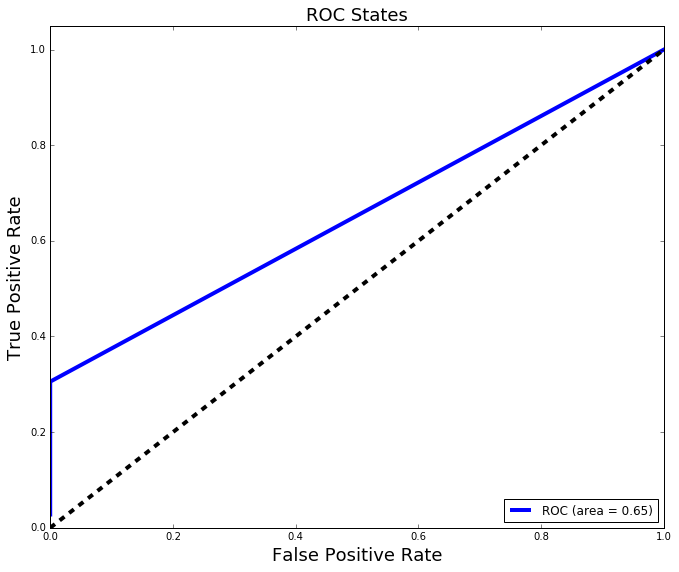

In [159]:
y_score = lr.decision_function(X_test)
plot_roc(y_test, y_score)

In [160]:
Y_pred = lr.predict(X_test)

In [161]:
accuracy_score(y_test, Y_pred)

0.69230769230769229

In [162]:
precision_score(y_test, Y_pred)

0.69230769230769229

In [163]:
recall_score(y_test, Y_pred)

1.0

## Ridge Regression

In [164]:
from sklearn.linear_model import Ridge


clf = Ridge(alpha=1.0)
clf.fit(X, y) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [165]:
clf.coef_

array([-0.30945655, -0.30945578,  0.19054403, -0.30945705,  0.19054317,
        0.19054425,  0.25406111,  0.19054035,  0.25394657,  0.25405983,
       -0.30945736, -0.30945596, -0.30945578, -0.30946058,  0.25406096,
       -0.30945735, -0.30939893, -0.30958826, -0.3094572 , -0.30945852,
        0.19053906,  0.25405923, -0.30943091, -0.30945649,  0.19054477,
       -0.30945651,  0.19054386,  0.19054199,  0.19054444,  0.19054209,
        0.19053722, -0.3094563 , -0.30946011,  0.19053987,  0.25405989,
        0.19054192, -0.30945634, -0.30945339, -0.07927271,  0.19054425,
        0.1905434 , -0.30945527, -0.309456  ,  0.19054238,  0.19054214,
        0.19054285, -0.30944976,  0.190542  ,  0.19054422,  0.19054421,
        0.19054348, -0.30947369, -0.30945677,  0.19057682, -0.30945855,
        0.25405834,  0.19054226, -0.30945562,  0.19053975, -0.3095143 ,
        0.1905436 ,  0.19053728,  0.25404373,  0.19054392,  0.25406111,
        0.19053982,  0.25407111, -0.30943344, -0.30945501, -0.30

In [166]:
clf.predict(X)

array([ 0.80946057,  0.80945978,  0.80945954,  0.80945722,  0.87297728,
        0.8094595 ,  0.80945939,  0.87297533,  0.87297851,  0.80945775,
        0.80946025,  0.87297726,  0.80946013,  0.87297941,  0.87297674,
        0.80945963,  0.809461  ,  0.80946006,  0.8729752 ,  0.80945949,
        0.80946088,  0.80946075,  0.87297836,  0.80949422,  0.8094545 ,
        0.80946125,  0.80946217,  0.80946051,  0.90473136,  0.80945931,
        0.8094608 ,  0.87297574,  0.53964468,  0.80946126,  0.80945807,
        0.80945413,  0.87293861,  0.80946161,  0.80945966,  0.80946143,
        0.80946162,  0.87273318,  0.80943958,  0.87296113,  0.80946132,
        0.80945579,  0.87297901,  0.87290633,  0.80945462,  0.8094594 ,
        0.80946161,  0.6189174 ,  0.80946168,  0.80946165,  0.80945368,
        0.80946165,  0.90473136,  0.80945715,  0.80946032,  0.80945727,
        0.80946027,  0.80945468,  0.87297663,  0.80945645,  0.8094598 ,
        0.80931416,  0.80946125,  0.87297851,  0.87286397,  0.87

## Lasso Regression

In [167]:
from sklearn.linear_model import Lasso


ols = Lasso(alpha=1.0)
ols.fit(X, y) 


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [168]:
ols.coef_

array([-0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,
       -0.,  0., -0., -0., -0., -0., -0.,  0.,  0., -0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,
        0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0.,
       -0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,
       -0., -0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
        0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,  0.])